## Рубежный контроль №1 по курсу "Технологии машинного обучения"
### Выполнила студентка 3 курса Курганова Александра, ИУ5-63
#### Вариант №1, датасет: "Toy Dataset"
#### Задание: для заданного набора данных проведите корреляционный анализ. в случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")

### первичный анализ датасета
#### считывание датасета, просмотр нескольких строк, размера, типа данных и наличия пропусков, преобразование типа данных

In [144]:
data = pd.read_csv("toy_dataset.csv", sep=",")

In [145]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [146]:
data.shape

(150000, 6)

In [147]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [148]:
# удаление колонки "Number", так как она не влияет на анализ датасета
data = data.drop(columns = ["Number"])
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


In [149]:
new = []
for col in data.columns:
    if data[col].dtype == 'object':
        new.append(col)
encode = {}
for col in new:
    le = LabelEncoder()
    data[[col]] = le.fit_transform(data[col])  
    encode[col] = le

In [150]:
data.dtypes

City         int64
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

In [151]:
data.isnull().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

### корреляционный анализ датасета

#### проверка корреляции признаков позволяет решить две задачи: понять какие признаки наиболее сильно коррелируют с целевым признаком и понять какие нецелевые признаки линейно зависимы между собой

In [152]:
data.corr()

,City,Gender,Age,Income,Illness
City,1.000000,0.002188,-0.000636,0.234541,-0.001712
Gender,0.002188,1.000000,-0.003653,0.198888,0.001297
Age,-0.000636,-0.003653,1.000000,-0.001318,0.001811
Income,0.234541,0.198888,-0.001318,1.000000,0.000298
Illness,-0.001712,0.001297,0.001811,0.000298,1.000000


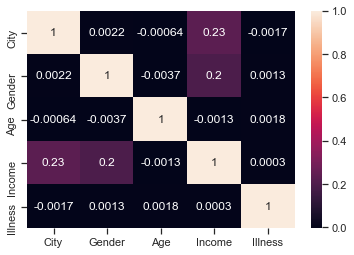

In [153]:
sns.heatmap(data.corr(), annot = True)

### на основе корреляционной матрицы и тепловой карты можно сделать следующие выводы:
#### с целевым признаком заболеваний "Illness" остальные колонки вообще почти не коррелируют. этот датасет не самый подходящий для построения моделей машинного обучения, его признаки также почти не приносят вклад в построение модели.